# **GPU Counter**

In [2]:
import tensorflow as tf
#number of GPU
print('Number of GPUs Available: ',len(tf.config.list_physical_devices('GPU')))

Number of GPUs Available:  2


# **Importing Header Files**

In [3]:
import PIL
import numpy as np
import pandas as pd
import os
import warnings



In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

# **Loading The Dataset**

In [5]:
os.chdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/')

In [6]:
os.getcwd()

'/kaggle/input/vegetable-image-dataset/Vegetable Images'

In [7]:
train_dir='train'
test_dir='test'
val_dir='validation'

# **Data Preprocessing**

In [8]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)
val_datagen=ImageDataGenerator(
    rescale=1.0/255
)
test_datagen=ImageDataGenerator(
    rescale=1.0/255
)



In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical'  
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical' 
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical', 
    shuffle=False  # Usually don't shuffle test data
)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


# **Encoding Labels**

In [10]:
class_map = {v: k for k, v in train_generator.class_indices.items()}
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [11]:
print(test_generator.class_indices)

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


# **CNN Dual GPU Code**

In [12]:
import tensorflow as tf

In [13]:
# Set up mirargmaxrored strategy to utilize multiple GPUs
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Build and compile your model inside the strategy scope
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)
    
              
    
    

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,460,303 (13.20 MB)

 Trainable params: 3,460,303 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# Training the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 175s 350ms/step - accuracy: 0.2222 - loss: 2.2212 - val_accuracy: 0.5233 - val_loss: 1.4149
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 204ms/step - accuracy: 0.5442 - loss: 1.3413 - val_accuracy: 0.6760 - val_loss: 0.8942
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 205ms/step - accuracy: 0.6845 - loss: 0.9285 - val_accuracy: 0.7340 - val_loss: 0.7806
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 215ms/step - accuracy: 0.7514 - loss: 0.7354 - val_accuracy: 0.7793 - val_loss: 0.7337
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 215ms/step - accuracy: 0.7935 - loss: 0.6120 - val_accuracy: 0.7887 - val_loss: 0.6382
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 209ms/step - accuracy: 0.8332 - loss: 0.5076 - val_accuracy: 0.8913 - val_loss: 0.3544
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 207ms/step - accuracy: 0.8645 - loss: 0.4274 - val_accuracy: 0.9020 - val_loss: 0.3164
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 207ms/step - accuracy: 0.8842 - loss: 0.3596 -

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.9680 - loss: 0.1329
Test Loss: 0.1275
Test Accuracy: 97.13%


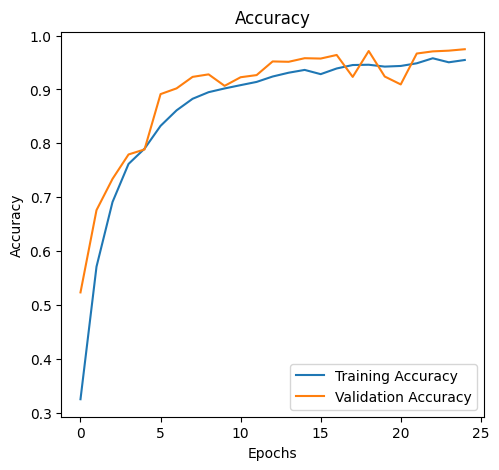

In [17]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

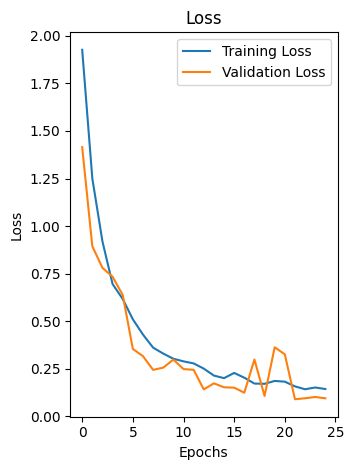

In [18]:
# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step


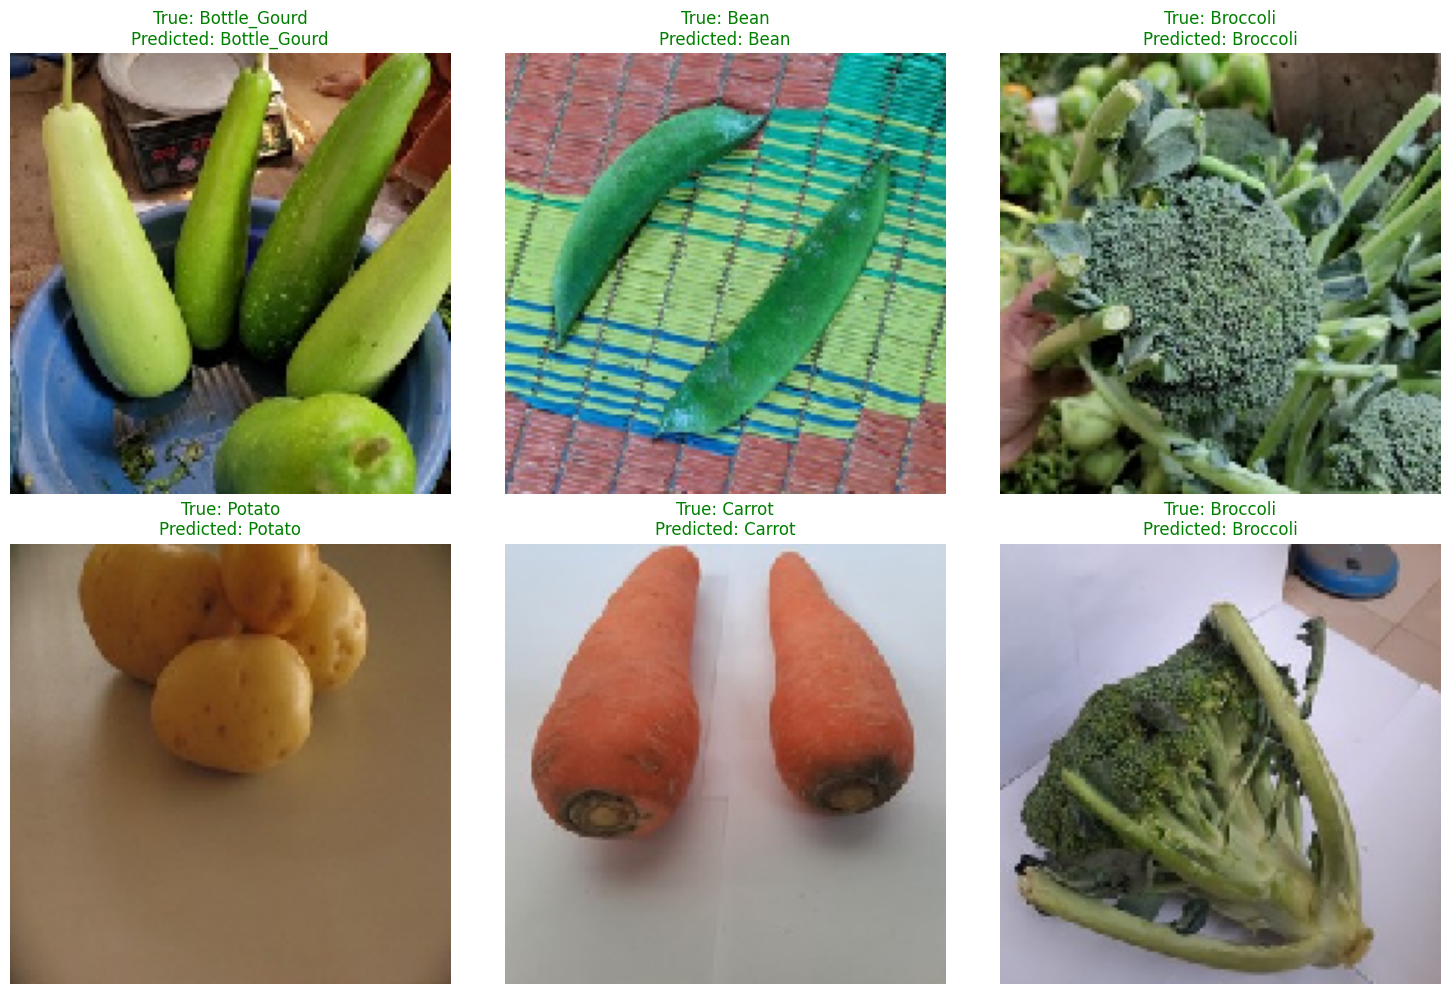

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate predictions for all images in the test set
predictions = model.predict(test_generator, verbose=1)  # Get predictions for all test images

# Initialize lists to store predicted labels, true labels, and corresponding images
predicted_labels = []
true_labels = []
images_to_show = []

# Loop through each batch of images in the test set
for i in range(len(test_generator)):
    images, labels = test_generator[i]  # Get the batch of images and labels

    for j in range(images.shape[0]):
        # Get the predicted class probabilities for the current image
        class_probabilities = predictions[i * test_generator.batch_size + j]  # This should be (74, 74, 15)
        
        # Flatten the predictions to get the class probabilities
        class_probabilities_flat = class_probabilities.reshape(-1, class_probabilities.shape[-1])  # Shape will be (74*74, 15)
        
        # Find the class index with the highest probability
        predicted_class_index = np.argmax(np.mean(class_probabilities_flat, axis=0))  # Average over the spatial dimensions

        # Get the true label (from one-hot encoded labels)
        true_label_index = np.argmax(labels[j])  # Assuming labels are in one-hot encoded format

        # Append the predicted label and the corresponding image
        if predicted_class_index < len(class_labels) and true_label_index < len(class_labels):
            predicted_labels.append(class_labels[predicted_class_index])
            true_labels.append(class_labels[true_label_index])
            images_to_show.append(images[j])
        else:
            print(f"Index out of range: predicted {predicted_class_index}, true {true_label_index}")

# Ensure we have images to show before sampling
if len(images_to_show) > 0:
    # Randomly select 6 images to display
    num_images_to_show = 6
    random_indices = random.sample(range(len(images_to_show)), num_images_to_show)

    # Set up the plotting grid for 6 images
    plt.figure(figsize=(15, 10))
    for idx, i in enumerate(random_indices):
        plt.subplot(2, 3, idx + 1)  # 2 rows and 3 columns
        plt.imshow(images_to_show[i])  # Show the image

        # Determine color for title based on prediction correctness
        title_color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}', color=title_color)  # Show true and predicted class labels

        plt.axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("No valid images to display.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


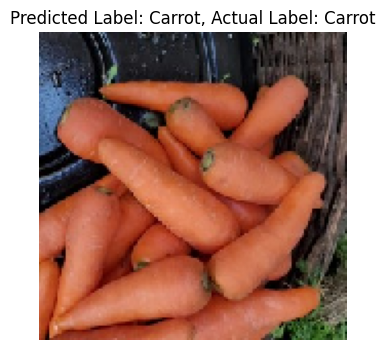

In [23]:
from tensorflow.keras.preprocessing import image
test_image_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Carrot/1001.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Carrot')

# **EfficientNet**

In [24]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D

In [25]:
# Set up mirrored strategy to utilize multiple GPUs
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Load EfficientNetB0
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    
    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
# Training the model
history = model.fit(
    train_generator,
    epochs=25,  # Adjust based on your needs
    validation_data=val_generator
)


Epoch 1/25


2024-10-02 07:14:27.661664: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_1552/cond/StatefulPartitionedCall/replica_1/sequential_1_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 ━━━━━━━━━━━━━━━━━━━━ 262s 291ms/step - accuracy: 0.8165 - loss: 0.6310 - val_accuracy: 0.1433 - val_loss: 3.4563
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 262ms/step - accuracy: 0.9598 - loss: 0.1348 - val_accuracy: 0.8373 - val_loss: 0.5341
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 258ms/step - accuracy: 0.9733 - loss: 0.0905 - val_accuracy: 0.9573 - val_loss: 0.1876
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 259ms/step - accuracy: 0.9739 - loss: 0.0841 - val_accuracy: 0.9833 - val_loss: 0.0511
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 260ms/step - accuracy: 0.9757 - loss: 0.0789 - val_accuracy: 0.9253 - val_loss: 0.2346
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 259ms/step - accuracy: 0.9761 - loss: 0.0771 - val_accuracy: 0.8167 - val_loss: 0.8176
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 122s 257ms/step - accuracy: 0.9780 - loss: 0.0761 - val_accuracy: 0.9847 - val_loss: 0.0534
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 122s 257ms/step - accuracy: 0.9820 - loss: 0.06

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9816 - loss: 0.0905
Test Loss: 0.2740
Test Accuracy: 93.47%


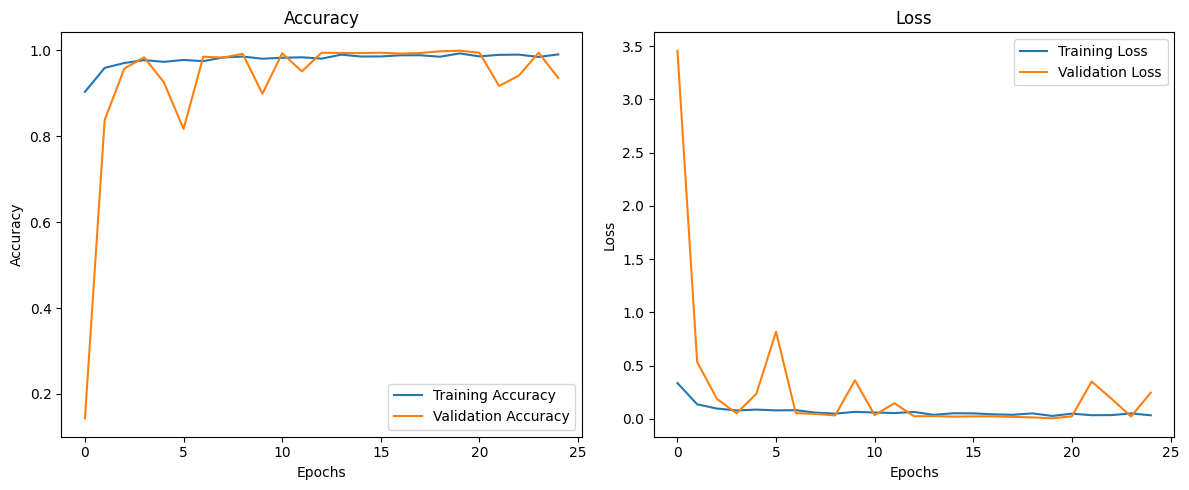

In [28]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step


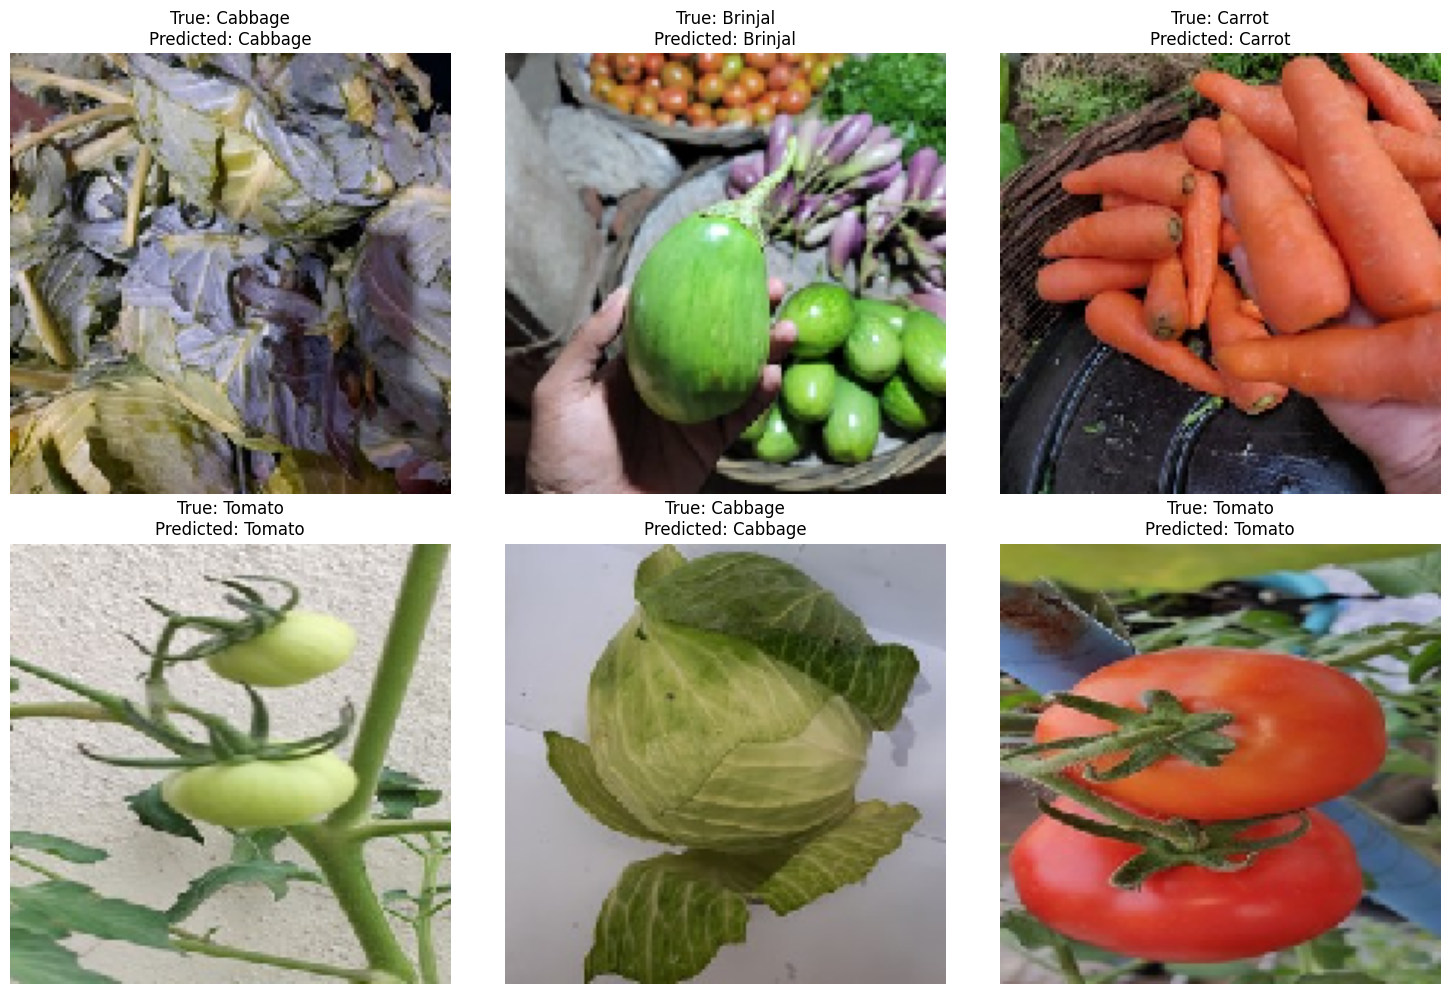

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate predictions for all images in the test set
predictions = model.predict(test_generator, verbose=1)  # Get predictions for all test images

# Initialize lists to store predicted labels, true labels, and corresponding images
predicted_labels = []
true_labels = []
images_to_show = []

# Loop through each batch of images in the test set
for i in range(len(test_generator)):
    images, labels = test_generator[i]  # Get the batch of images and labels

    for j in range(images.shape[0]):
        # Get the predicted class probabilities for the current image
        class_probabilities = predictions[i * test_generator.batch_size + j]  # This should be (74, 74, 15)
        
        # Flatten the predictions to get the class probabilities
        class_probabilities_flat = class_probabilities.reshape(-1, class_probabilities.shape[-1])  # Shape will be (74*74, 15)
        
        # Find the class index with the highest probability
        predicted_class_index = np.argmax(np.mean(class_probabilities_flat, axis=0))  # Average over the spatial dimensions

        # Get the true label (from one-hot encoded labels)
        true_label_index = np.argmax(labels[j])  # Assuming labels are in one-hot encoded format

        # Append the predicted label and the corresponding image
        if predicted_class_index < len(class_labels) and true_label_index < len(class_labels):
            predicted_labels.append(class_labels[predicted_class_index])
            true_labels.append(class_labels[true_label_index])
            images_to_show.append(images[j])
        else:
            print(f"Index out of range: predicted {predicted_class_index}, true {true_label_index}")

# Ensure we have images to show before sampling
if len(images_to_show) > 0:
    # Randomly select 6 images to display
    num_images_to_show = 6
    random_indices = random.sample(range(len(images_to_show)), num_images_to_show)

    # Set up the plotting grid for 6 images
    plt.figure(figsize=(15, 10))
    for idx, i in enumerate(random_indices):
        plt.subplot(2, 3, idx + 1)  # 2 rows and 3 columns
        plt.imshow(images_to_show[i])  # Show the image
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')  # Show true and predicted class labels
        plt.axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("No valid images to display.")


W0000 00:00:1727856517.651993      31 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Conv2D" attr { key: "T" value { type: DT_FLOAT } } attr { key: "data_format" value { s: "NCHW" } } attr { key: "dilations" value { list { i: 1 i: 1 i: 1 i: 1 } } } attr { key: "explicit_paddings" value { list { } } } attr { key: "padding" value { s: "VALID" } } attr { key: "strides" value { list { i: 1 i: 1 i: 2 i: 2 } } } attr { key: "use_cudnn_on_gpu" value { b: true } } inputs { dtype: DT_FLOAT shape { dim { } dim { size: 3 } dim { size: 151 } dim { size: 151 } } } inputs { dtype: DT_FLOAT shape { dim { size: 3 } dim { size: 3 } dim { size: 3 } dim { size: 32 } } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla T4" frequency: 1590 num_cores: 40 environment { key: "architecture" value: "7.5" } environment { key: "cuda" value: "12030" } environment { key: "cudnn" value: "8906" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multip

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


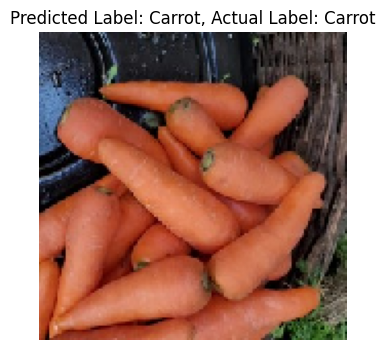

In [30]:
test_image_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Carrot/1001.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Carrot')

# **InceptionV3 with Early Stopping**

In [31]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

In [32]:

# Set up mirrored strategy to utilize multiple GPUs
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Load InceptionV3 base model without the top layers
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    
    # Build the model
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:

# Set up early stopping to monitor validation loss and stop if it doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)


In [34]:
# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=50,  # Set a high limit, but early stopping will prevent overfitting
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 286s 317ms/step - accuracy: 0.6460 - loss: 1.2438 - val_accuracy: 0.6327 - val_loss: 2.5323
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 286ms/step - accuracy: 0.8520 - loss: 0.5099 - val_accuracy: 0.7480 - val_loss: 0.8988
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 287ms/step - accuracy: 0.8939 - loss: 0.3579 - val_accuracy: 0.8587 - val_loss: 0.5015
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 286ms/step - accuracy: 0.9071 - loss: 0.3096 - val_accuracy: 0.7880 - val_loss: 1.0621
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 284ms/step - accuracy: 0.9288 - loss: 0.2437 - val_accuracy: 0.8633 - val_loss: 0.4686
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 284ms/step - accuracy: 0.9297 - loss: 0.2290 - val_accuracy: 0.9493 - val_loss: 0.1799
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 134s 283ms/step - accuracy: 0.9454 - loss: 0.1877 - val_accuracy: 0.7607 - val_loss: 1.4410
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 284ms/step - accuracy: 0.9407 -

In [35]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9528 - loss: 0.1691
Test Loss: 0.2057
Test Accuracy: 94.27%


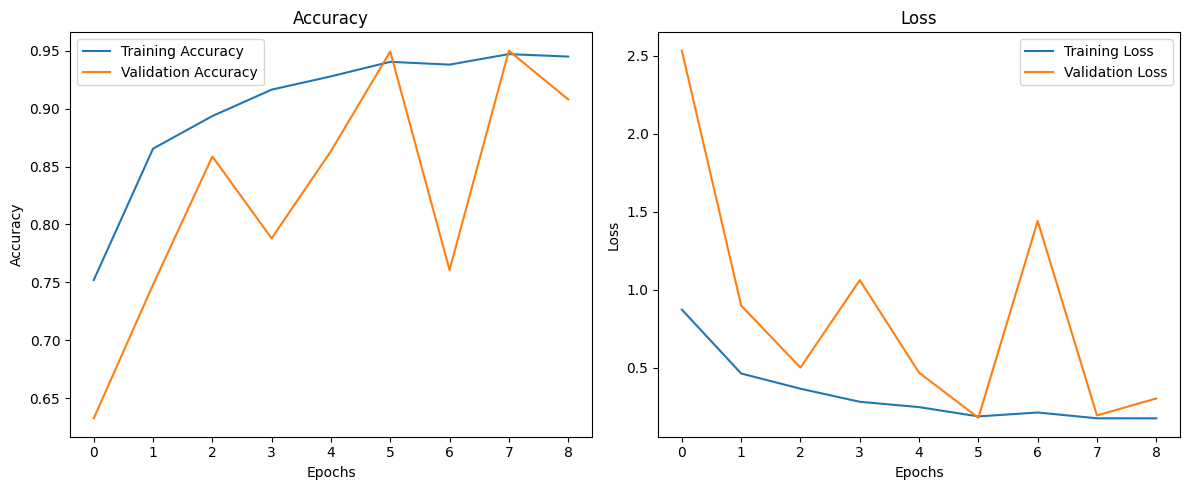

In [36]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step


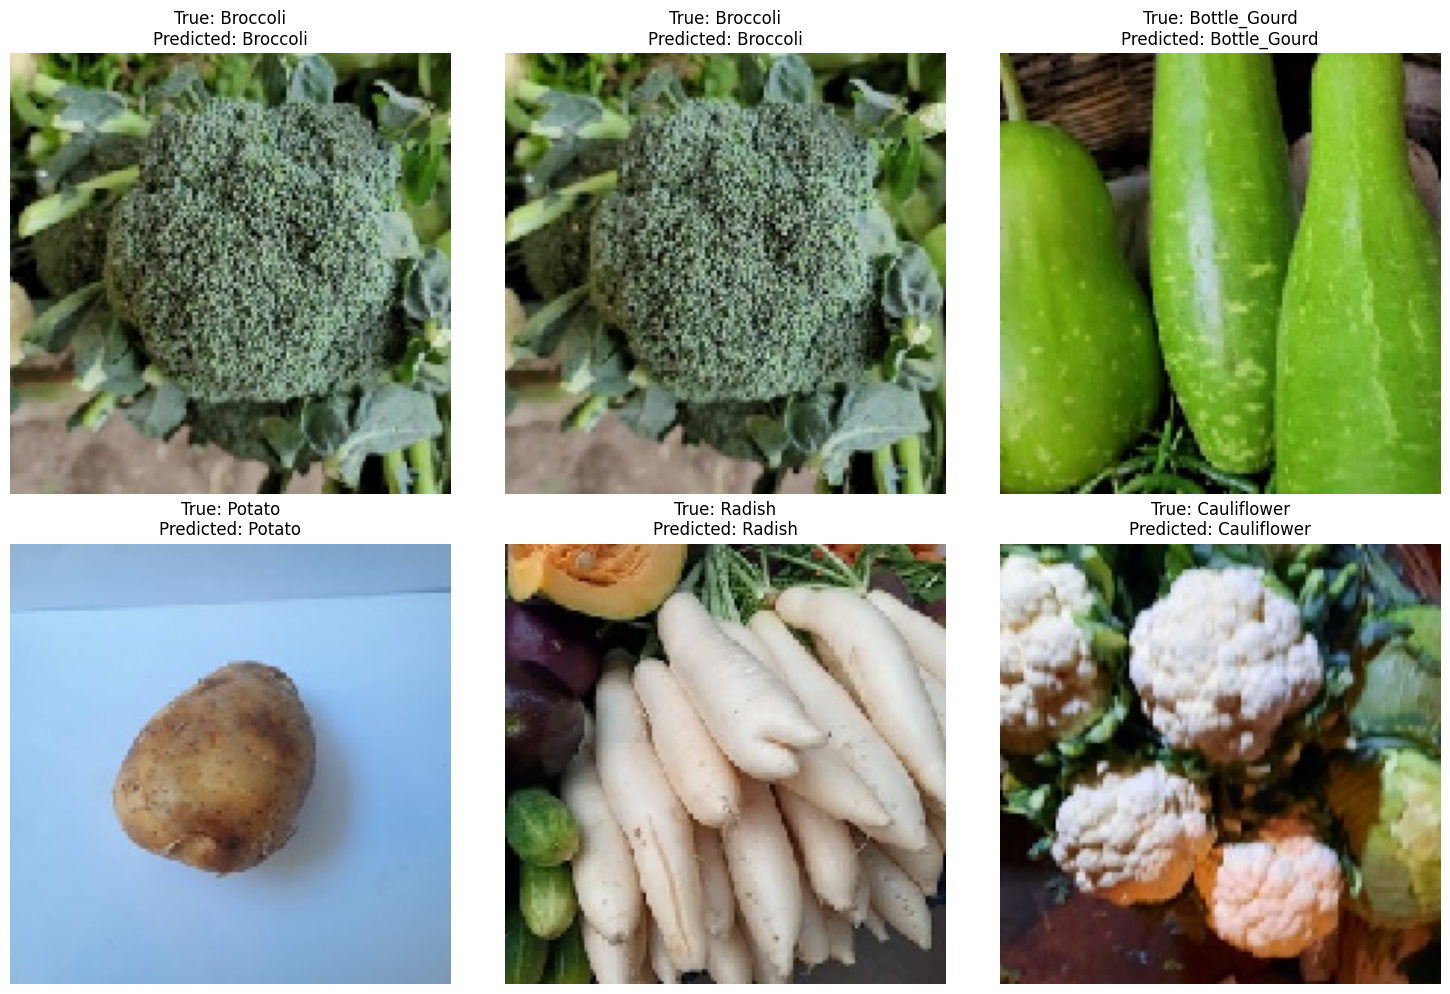

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate predictions for all images in the test set
predictions = model.predict(test_generator, verbose=1)  # Get predictions for all test images

# Initialize lists to store predicted labels, true labels, and corresponding images
predicted_labels = []
true_labels = []
images_to_show = []

# Loop through each batch of images in the test set
for i in range(len(test_generator)):
    images, labels = test_generator[i]  # Get the batch of images and labels

    for j in range(images.shape[0]):
        # Get the predicted class probabilities for the current image
        class_probabilities = predictions[i * test_generator.batch_size + j]  # This should be (74, 74, 15)
        
        # Flatten the predictions to get the class probabilities
        class_probabilities_flat = class_probabilities.reshape(-1, class_probabilities.shape[-1])  # Shape will be (74*74, 15)
        
        # Find the class index with the highest probability
        predicted_class_index = np.argmax(np.mean(class_probabilities_flat, axis=0))  # Average over the spatial dimensions

        # Get the true label (from one-hot encoded labels)
        true_label_index = np.argmax(labels[j])  # Assuming labels are in one-hot encoded format

        # Append the predicted label and the corresponding image
        if predicted_class_index < len(class_labels) and true_label_index < len(class_labels):
            predicted_labels.append(class_labels[predicted_class_index])
            true_labels.append(class_labels[true_label_index])
            images_to_show.append(images[j])
        else:
            print(f"Index out of range: predicted {predicted_class_index}, true {true_label_index}")

# Ensure we have images to show before sampling
if len(images_to_show) > 0:
    # Randomly select 6 images to display
    num_images_to_show = 6
    random_indices = random.sample(range(len(images_to_show)), num_images_to_show)

    # Set up the plotting grid for 6 images
    plt.figure(figsize=(15, 10))
    for idx, i in enumerate(random_indices):
        plt.subplot(2, 3, idx + 1)  # 2 rows and 3 columns
        plt.imshow(images_to_show[i])  # Show the image
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')  # Show true and predicted class labels
        plt.axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("No valid images to display.")


W0000 00:00:1727857930.271167      31 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Conv2D" attr { key: "T" value { type: DT_FLOAT } } attr { key: "data_format" value { s: "NCHW" } } attr { key: "dilations" value { list { i: 1 i: 1 i: 1 i: 1 } } } attr { key: "explicit_paddings" value { list { } } } attr { key: "padding" value { s: "VALID" } } attr { key: "strides" value { list { i: 1 i: 1 i: 2 i: 2 } } } attr { key: "use_cudnn_on_gpu" value { b: true } } inputs { dtype: DT_FLOAT shape { dim { } dim { size: 3 } dim { size: 150 } dim { size: 150 } } } inputs { dtype: DT_FLOAT shape { dim { size: 3 } dim { size: 3 } dim { size: 3 } dim { size: 32 } } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla T4" frequency: 1590 num_cores: 40 environment { key: "architecture" value: "7.5" } environment { key: "cuda" value: "12030" } environment { key: "cudnn" value: "8906" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multip

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


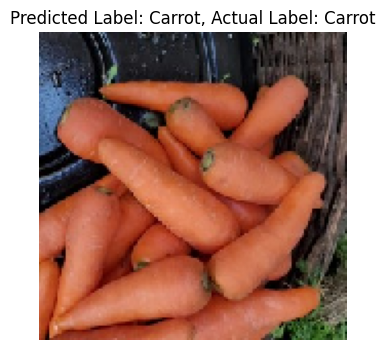

In [38]:
test_image_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Carrot/1001.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Carrot')

# **Hybrid Model**

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.applications import EfficientNetB0, InceptionV3


In [42]:

# Set up mirrored strategy to utilize multiple GPUs
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Input layer
    input_tensor = Input(shape=(150, 150, 3))

    # Load EfficientNetB0 base model without the top layers
    efficient_net = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_tensor)
    efficient_net_output = GlobalAveragePooling2D()(efficient_net.output)

    # Load InceptionV3 base model without the top layers
    inception_net = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_tensor)
    inception_net_output = GlobalAveragePooling2D()(inception_net.output)

    # Concatenate outputs from both models
    merged = Concatenate()([efficient_net_output, inception_net_output])

    # Add dropout and dense layers for classification
    x = Dropout(0.5)(merged)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(15, activation='softmax')(x)

    # Create the model
    model = Model(inputs=input_tensor, outputs=output)
    
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )


In [43]:

# Set up early stopping to monitor validation loss and stop if it doesn't improve for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)


In [44]:
# Training the model
history = model.fit(
    train_generator,
    epochs=50,  # Adjust based on your needs
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/50


2024-10-02 08:35:46.938206: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/cond/else/_3070/cond/StatefulPartitionedCall/functional_15_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 ━━━━━━━━━━━━━━━━━━━━ 487s 448ms/step - accuracy: 0.7355 - loss: 0.9589 - val_accuracy: 0.0953 - val_loss: 102.8761
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 423ms/step - accuracy: 0.9286 - loss: 0.2600 - val_accuracy: 0.8680 - val_loss: 2.7869
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 423ms/step - accuracy: 0.9455 - loss: 0.1916 - val_accuracy: 0.5813 - val_loss: 2.0731
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 423ms/step - accuracy: 0.9492 - loss: 0.1853 - val_accuracy: 0.9660 - val_loss: 0.1056
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 420ms/step - accuracy: 0.9649 - loss: 0.1281 - val_accuracy: 0.9460 - val_loss: 5.1855
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 421ms/step - accuracy: 0.9671 - loss: 0.1154 - val_accuracy: 0.9287 - val_loss: 1.5376
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 420ms/step - accuracy: 0.9603 - loss: 0.1528 - val_accuracy: 0.9660 - val_loss: 0.3174


In [49]:
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 150, 150,  │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 150, 150,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 150, 150,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 82,540,586 (314.87 MB)

 Trainable params: 27,488,043 (104.86 MB)

 Non-trainable params: 76,455 (298.66 KB)

 Optimizer params: 54,976,088 (209.72 MB)

In [45]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9832 - loss: 0.0694
Test Loss: 0.1172
Test Accuracy: 96.87%


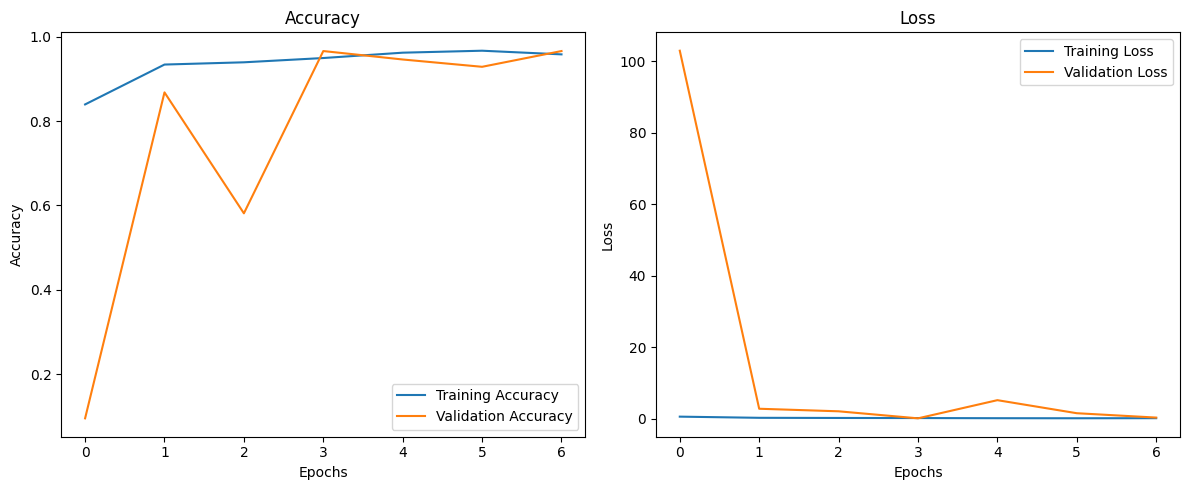

In [46]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 5))

# Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


W0000 00:00:1727859666.688666      31 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Conv2D" attr { key: "T" value { type: DT_FLOAT } } attr { key: "data_format" value { s: "NCHW" } } attr { key: "dilations" value { list { i: 1 i: 1 i: 1 i: 1 } } } attr { key: "explicit_paddings" value { list { } } } attr { key: "padding" value { s: "VALID" } } attr { key: "strides" value { list { i: 1 i: 1 i: 2 i: 2 } } } attr { key: "use_cudnn_on_gpu" value { b: true } } inputs { dtype: DT_FLOAT shape { dim { } dim { size: 3 } dim { size: 150 } dim { size: 150 } } } inputs { dtype: DT_FLOAT shape { dim { size: 3 } dim { size: 3 } dim { size: 3 } dim { size: 32 } } } device { type: "GPU" vendor: "NVIDIA" model: "Tesla T4" frequency: 1590 num_cores: 40 environment { key: "architecture" value: "7.5" } environment { key: "cuda" value: "12030" } environment { key: "cudnn" value: "8906" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 4194304 shared_memory_size_per_multip

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


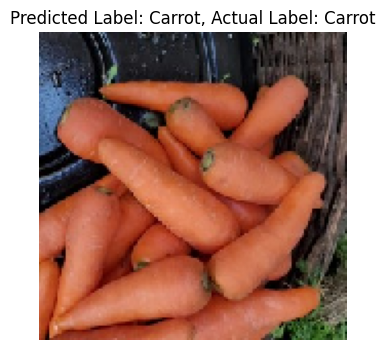

In [47]:
test_image_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Carrot/1001.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Carrot')

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step


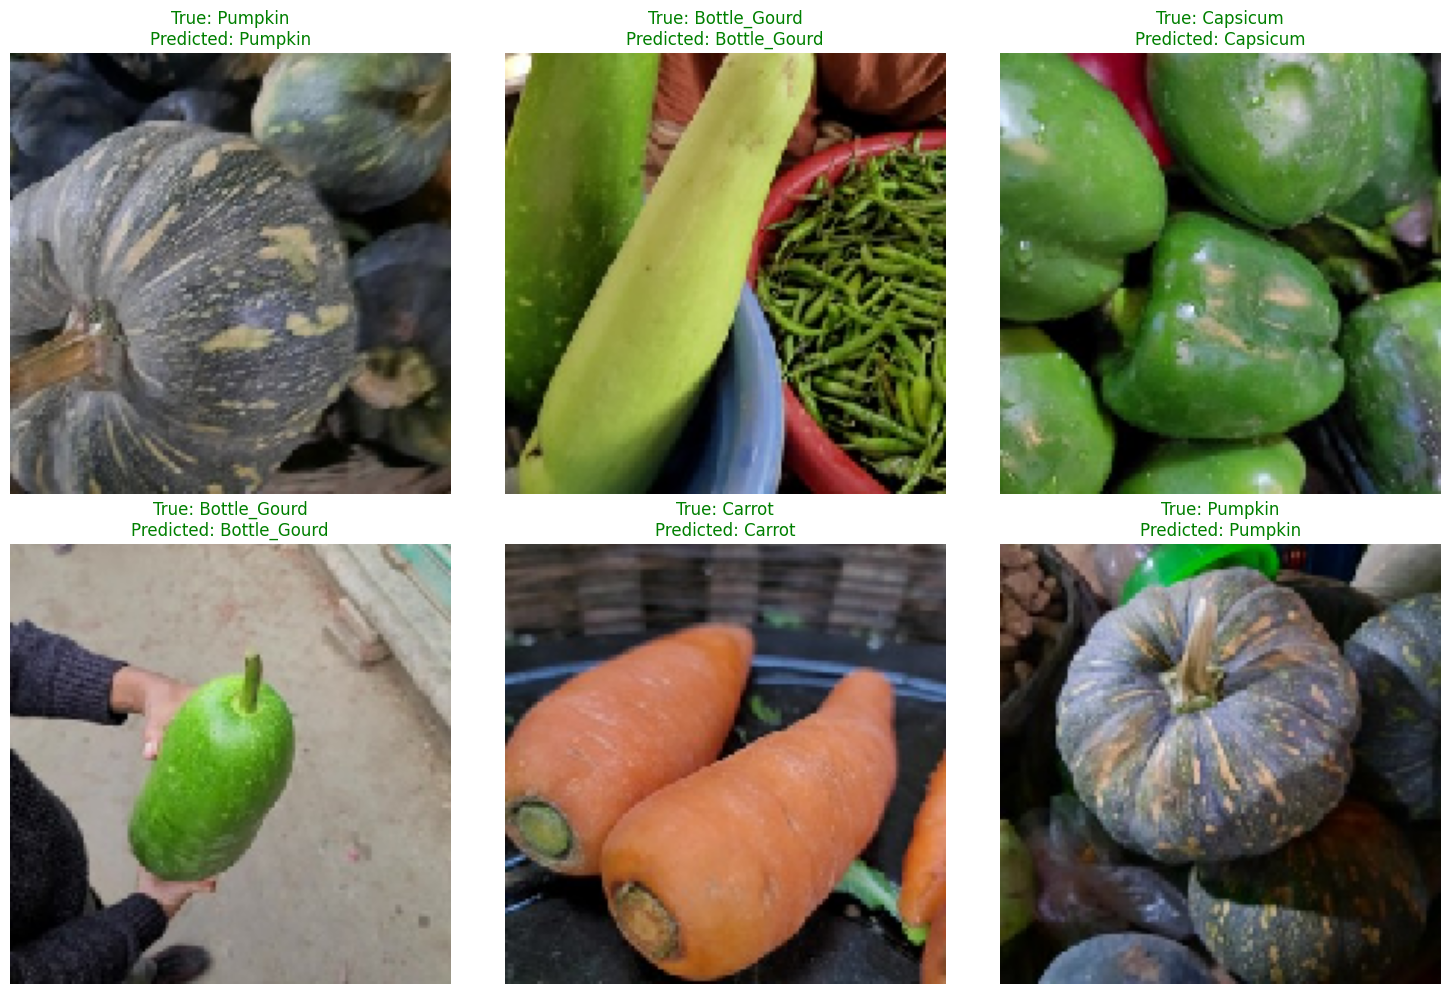

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate predictions for all images in the test set
predictions = model.predict(test_generator, verbose=1)  # Get predictions for all test images

# Initialize lists to store predicted labels, true labels, and corresponding images
predicted_labels = []
true_labels = []
images_to_show = []

# Loop through each batch of images in the test set
for i in range(len(test_generator)):
    images, labels = test_generator[i]  # Get the batch of images and labels

    for j in range(images.shape[0]):
        # Get the predicted class probabilities for the current image
        class_probabilities = predictions[i * test_generator.batch_size + j]  # This should be (74, 74, 15)
        
        # Flatten the predictions to get the class probabilities
        class_probabilities_flat = class_probabilities.reshape(-1, class_probabilities.shape[-1])  # Shape will be (74*74, 15)
        
        # Find the class index with the highest probability
        predicted_class_index = np.argmax(np.mean(class_probabilities_flat, axis=0))  # Average over the spatial dimensions

        # Get the true label (from one-hot encoded labels)
        true_label_index = np.argmax(labels[j])  # Assuming labels are in one-hot encoded format

        # Append the predicted label and the corresponding image
        if predicted_class_index < len(class_labels) and true_label_index < len(class_labels):
            predicted_labels.append(class_labels[predicted_class_index])
            true_labels.append(class_labels[true_label_index])
            images_to_show.append(images[j])
        else:
            print(f"Index out of range: predicted {predicted_class_index}, true {true_label_index}")

# Ensure we have images to show before sampling
if len(images_to_show) > 0:
    # Randomly select 6 images to display
    num_images_to_show = 6
    random_indices = random.sample(range(len(images_to_show)), num_images_to_show)

    # Set up the plotting grid for 6 images
    plt.figure(figsize=(15, 10))
    for idx, i in enumerate(random_indices):
        plt.subplot(2, 3, idx + 1)  # 2 rows and 3 columns
        plt.imshow(images_to_show[i])  # Show the image

        # Determine color for title based on prediction correctness
        title_color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}', color=title_color)  # Show true and predicted class labels

        plt.axis('off')  # Turn off axis

    plt.tight_layout()  # Adjust layout
    plt.show()
else:
    print("No valid images to display.")
